In [1]:
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


In [35]:
df = pd.read_csv('./data/selected/data_selected_2.csv', index_col=0)

In [36]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [37]:
df.head()

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,email,facebook,google,government_id,identity_manual,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,work_email,24-hourcheck-in,Accessible-heighttoilet,Airconditioning,BBQgrill,Babybath,Babysitterrecommendations,Bathtub,Bedlinens,Breakfast,Buildingstaff,Buzzer/wirelessintercom,CableTV,Carbonmonoxidedetector,Cat(s),Changingtable,Children’sbooksandtoys,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Disabledparkingspot,Dog(s),EVcharger,Elevator,Essentials,Ethernetconnection,Extrapillowsandblankets,Extraspacearoundbed,Family/kidfriendly,Fireextinguisher,Firstaidkit,Flatpathtoguestentrance,Freeparkingonpremises,Freestreetparking,Gameconsole,Gardenorbackyard,Gym,Hairdryer,Handheldshowerhead,Hangers,Heating,Highchair,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Internet,Iron,Keypad,Kitchen,Laptopfriendlyworkspace,Lockbox,Lockonbedroomdoor,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Other,Outletcovers,Oven,Pack’nPlay/travelcrib,Paidparkingoffpremises,Paidparkingonpremises,Patioorbalcony,Petsallowed,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Room-darkeningshades,Safetycard,Selfcheck-in,Shampoo,Singlelevelhome,Smartlock,Smokedetector,Smokingallowed,Stairgates,Stove,Suitableforevents,TV,Washer,Waterfront,Wideentranceforguests,Wideentryway,Widehallways,Windowguards,translationmissing:en.hosting_amenity_50,Apartment,Bed and breakfast,Boutique hotel,Condominium,Cottage,House,Serviced apartment,Entire home/apt,Hotel room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_30,0,a few days or more,within a day,within a few hours,within an hour
0,3836.0,100,1,3.0,1,1,51.46225,-0.11732,4,1.0,1.0,1.0,4.477337,400.0,30.0,2,20.0,3,180,3,3,180,180,3.0,180.0,185,2,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,2,0,0,1.58,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3792.0,90,0,4.0,1,0,51.56802,-0.11121,2,1.0,1.0,0.0,4.174387,100.0,15.0,1,15.0,1,29,1,1,29,29,1.0,29.0,19,5,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,1,1,0,0.17,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3554.0,0,0,1.0,1,0,51.49995,-0.02624,2,1.0,1.0,1.0,4.369448,-1.0,-1.0,2,0.0,2,365,2,2,365,365,2.0,365.0,137,0,95.0,9.0,10.0,10.0,10.0,9.0,9.0,1,1,0,0,1.23,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,3285.0,86,0,2.0,1,0,51.51074,-0.19853,2,1.0,1.0,1.0,4.653960,0.0,35.0,2,10.0,2,1125,2,90,1125,1125,14.1,1125.0,339,33,88.0,9.0,9.0,10.0,10.0,10.0,9.0,1,2,0,0,3.33,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

In [38]:
df.shape

(84489, 160)

In [7]:
# df['price'].describe()

In [8]:
# df[df['price'] == 0]

In [9]:
# df = df[df['price'] != 0]

In [10]:
# df[df['price'] == 0]

In [11]:
df.shape

(84489, 29)

In [39]:
dataset = df.loc[:, df.columns != 'price']
dataset

,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,email,facebook,google,government_id,identity_manual,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,work_email,24-hourcheck-in,Accessible-heighttoilet,Airconditioning,BBQgrill,Babybath,Babysitterrecommendations,Bathtub,Bedlinens,Breakfast,Buildingstaff,Buzzer/wirelessintercom,CableTV,Carbonmonoxidedetector,Cat(s),Changingtable,Children’sbooksandtoys,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Disabledparkingspot,Dog(s),EVcharger,Elevator,Essentials,Ethernetconnection,Extrapillowsandblankets,Extraspacearoundbed,Family/kidfriendly,Fireextinguisher,Firstaidkit,Flatpathtoguestentrance,Freeparkingonpremises,Freestreetparking,Gameconsole,Gardenorbackyard,Gym,Hairdryer,Handheldshowerhead,Hangers,Heating,Highchair,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Internet,Iron,Keypad,Kitchen,Laptopfriendlyworkspace,Lockbox,Lockonbedroomdoor,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Other,Outletcovers,Oven,Pack’nPlay/travelcrib,Paidparkingoffpremises,Paidparkingonpremises,Patioorbalcony,Petsallowed,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Room-darkeningshades,Safetycard,Selfcheck-in,Shampoo,Singlelevelhome,Smartlock,Smokedetector,Smokingallowed,Stairgates,Stove,Suitableforevents,TV,Washer,Waterfront,Wideentranceforguests,Wideentryway,Widehallways,Windowguards,translationmissing:en.hosting_amenity_50,Apartment,Bed and breakfast,Boutique hotel,Condominium,Cottage,House,Serviced apartment,Entire home/apt,Hotel room,Shared room,flexible,moderate,strict_14_with_grace_period,super_strict_30,0,a few days or more,within a day,within a few hours,within an hour
0,3836.0,100,1,3.0,1,1,51.46225,-0.11732,4,1.0,1.0,1.0,400.0,30.0,2,20.0,3,180,3,3,180,180,3.0,180.0,185,2,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,2,0,0,1.58,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3792.0,90,0,4.0,1,0,51.56802,-0.11121,2,1.0,1.0,0.0,100.0,15.0,1,15.0,1,29,1,1,29,29,1.0,29.0,19,5,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,1,1,0,0.17,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3554.0,0,0,1.0,1,0,51.49995,-0.02624,2,1.0,1.0,1.0,-1.0,-1.0,2,0.0,2,365,2,2,365,365,2.0,365.0,137,0,95.0,9.0,10.0,10.0,10.0,9.0,9.0,1,1,0,0,1.23,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,3285.0,86,0,2.0,1,0,51.51074,-0.19853,2,1.0,1.0,1.0,0.0,35.0,2,10.0,2,1125,2,90,1125,1125,14.1,1125.0,339,33,88.0,9.0,9.0,10.0,10.0,10.0,9.0,1,2,0,0,3.33,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
5,3773.0,0,0,

In [40]:
X = dataset.loc[:, dataset.columns != 'city'].values

# X = X.loc[:, :'review_scores_value']

# X.drop(['id', 'host_id'], axis=1, inplace=True)

X

array([[3.836e+03, 1.000e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.792e+03, 9.000e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.554e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.720e+02, 1.000e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.580e+02, 5.000e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.940e+02, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [41]:
# Y = df.loc[:, df.columns == 'price'].values
# Y

# def clean_price(entry):
#     return np.log(float(entry))

# df['price'] = df['price'].apply(clean_price)

Y = df.loc[:, df.columns == 'price'].values
Y

array([[4.47733681],
       [4.17438727],
       [4.36944785],
       ...,
       [4.49980967],
       [3.40119738],
       [5.23110862]])

In [42]:
df['price'].describe()

count    84489.000000
mean         4.434210
std          0.783596
min          0.000000
25%          3.850148
50%          4.430817
75%          4.941642
max          9.421006
Name: price, dtype: float64

In [43]:
# df.to_csv('./data/data_cleaned_3.csv')

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
# X_normalise = preprocessing.normalize(X)

In [45]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [46]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [47]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(59142, 159) (12673, 159) (12674, 159) (59142, 1) (12673, 1) (12674, 1)


In [48]:
df['price'].describe()

count    84489.000000
mean         4.434210
std          0.783596
min          0.000000
25%          3.850148
50%          4.430817
75%          4.941642
max          9.421006
Name: price, dtype: float64

## Model 1

In [58]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(159,)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear'),
])

In [59]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [60]:
hist = model.fit(X_train, Y_train,
          batch_size=100, epochs=400,
          validation_data=(X_val, Y_val))

Train on 59142 samples, validate on 12673 samples
Epoch 1/400
59142/59142 [==============================] - 1s 16us/step - loss: 0.5515 - accuracy: 0.0000e+00 - val_loss: 0.2222 - val_accuracy: 0.0000e+00
Epoch 2/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.2118 - accuracy: 0.0000e+00 - val_loss: 0.1992 - val_accuracy: 0.0000e+00
Epoch 3/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.1987 - accuracy: 0.0000e+00 - val_loss: 0.1930 - val_accuracy: 0.0000e+00
Epoch 4/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.1887 - accuracy: 0.0000e+00 - val_loss: 0.1932 - val_accuracy: 0.0000e+00
Epoch 5/400
59142/59142 [==============================] - 1s 8us/step - loss: 0.1827 - accuracy: 0.0000e+00 - val_loss: 0.1935 - val_accuracy: 0.0000e+00
Epoch 6/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.1771 - accuracy: 0.0000e+00 - val_loss: 0.1835 - val_accuracy: 0.0000e+00
Epoch 7/400
59142/

59142/59142 [==============================] - 1s 9us/step - loss: 0.0940 - accuracy: 0.0000e+00 - val_loss: 0.2122 - val_accuracy: 0.0000e+00
Epoch 54/400
59142/59142 [==============================] - 1s 8us/step - loss: 0.0933 - accuracy: 0.0000e+00 - val_loss: 0.2096 - val_accuracy: 0.0000e+00
Epoch 55/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0933 - accuracy: 0.0000e+00 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 56/400
59142/59142 [==============================] - 1s 12us/step - loss: 0.0920 - accuracy: 0.0000e+00 - val_loss: 0.2149 - val_accuracy: 0.0000e+00
Epoch 57/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.0911 - accuracy: 0.0000e+00 - val_loss: 0.2134 - val_accuracy: 0.0000e+00
Epoch 58/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.0907 - accuracy: 0.0000e+00 - val_loss: 0.2181 - val_accuracy: 0.0000e+00
Epoch 59/400
59142/59142 [==============================] - 1s 9us/step - 

59142/59142 [==============================] - 1s 10us/step - loss: 0.0697 - accuracy: 0.0000e+00 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 106/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0693 - accuracy: 0.0000e+00 - val_loss: 0.2363 - val_accuracy: 0.0000e+00
Epoch 107/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0698 - accuracy: 0.0000e+00 - val_loss: 0.2379 - val_accuracy: 0.0000e+00
Epoch 108/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0691 - accuracy: 0.0000e+00 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 109/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0687 - accuracy: 0.0000e+00 - val_loss: 0.2352 - val_accuracy: 0.0000e+00
Epoch 110/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0699 - accuracy: 0.0000e+00 - val_loss: 0.2389 - val_accuracy: 0.0000e+00
Epoch 111/400
59142/59142 [==============================] - 1s 9us/ste

59142/59142 [==============================] - 1s 12us/step - loss: 0.0585 - accuracy: 0.0000e+00 - val_loss: 0.2527 - val_accuracy: 0.0000e+00
Epoch 158/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0592 - accuracy: 0.0000e+00 - val_loss: 0.2489 - val_accuracy: 0.0000e+00
Epoch 159/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.0585 - accuracy: 0.0000e+00 - val_loss: 0.2474 - val_accuracy: 0.0000e+00
Epoch 160/400
59142/59142 [==============================] - 1s 17us/step - loss: 0.0581 - accuracy: 0.0000e+00 - val_loss: 0.2583 - val_accuracy: 0.0000e+00
Epoch 161/400
59142/59142 [==============================] - 1s 11us/step - loss: 0.0585 - accuracy: 0.0000e+00 - val_loss: 0.2564 - val_accuracy: 0.0000e+00
Epoch 162/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0586 - accuracy: 0.0000e+00 - val_loss: 0.2490 - val_accuracy: 0.0000e+00
Epoch 163/400
59142/59142 [==============================] - 1s 9us/

59142/59142 [==============================] - 1s 9us/step - loss: 0.0528 - accuracy: 0.0000e+00 - val_loss: 0.2576 - val_accuracy: 0.0000e+00
Epoch 210/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0525 - accuracy: 0.0000e+00 - val_loss: 0.2592 - val_accuracy: 0.0000e+00
Epoch 211/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.0523 - accuracy: 0.0000e+00 - val_loss: 0.2550 - val_accuracy: 0.0000e+00
Epoch 212/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.0527 - accuracy: 0.0000e+00 - val_loss: 0.2610 - val_accuracy: 0.0000e+00
Epoch 213/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0529 - accuracy: 0.0000e+00 - val_loss: 0.2609 - val_accuracy: 0.0000e+00
Epoch 214/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0526 - accuracy: 0.0000e+00 - val_loss: 0.2652 - val_accuracy: 0.0000e+00
Epoch 215/400
59142/59142 [==============================] - 1s 9us/ste

59142/59142 [==============================] - 1s 9us/step - loss: 0.0485 - accuracy: 0.0000e+00 - val_loss: 0.2758 - val_accuracy: 0.0000e+00
Epoch 262/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0486 - accuracy: 0.0000e+00 - val_loss: 0.2726 - val_accuracy: 0.0000e+00
Epoch 263/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0482 - accuracy: 0.0000e+00 - val_loss: 0.2789 - val_accuracy: 0.0000e+00
Epoch 264/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0487 - accuracy: 0.0000e+00 - val_loss: 0.2789 - val_accuracy: 0.0000e+00
Epoch 265/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.0484 - accuracy: 0.0000e+00 - val_loss: 0.2764 - val_accuracy: 0.0000e+00
Epoch 266/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0481 - accuracy: 0.0000e+00 - val_loss: 0.2743 - val_accuracy: 0.0000e+00
Epoch 267/400
59142/59142 [==============================] - 1s 9us/step

59142/59142 [==============================] - 1s 9us/step - loss: 0.0451 - accuracy: 0.0000e+00 - val_loss: 0.2790 - val_accuracy: 0.0000e+00
Epoch 314/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.0455 - accuracy: 0.0000e+00 - val_loss: 0.2831 - val_accuracy: 0.0000e+00
Epoch 315/400
59142/59142 [==============================] - 1s 11us/step - loss: 0.0452 - accuracy: 0.0000e+00 - val_loss: 0.2814 - val_accuracy: 0.0000e+00
Epoch 316/400
59142/59142 [==============================] - 1s 11us/step - loss: 0.0459 - accuracy: 0.0000e+00 - val_loss: 0.2861 - val_accuracy: 0.0000e+00
Epoch 317/400
59142/59142 [==============================] - 1s 11us/step - loss: 0.0453 - accuracy: 0.0000e+00 - val_loss: 0.2927 - val_accuracy: 0.0000e+00
Epoch 318/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0457 - accuracy: 0.0000e+00 - val_loss: 0.2836 - val_accuracy: 0.0000e+00
Epoch 319/400
59142/59142 [==============================] - 1s 9us/s

59142/59142 [==============================] - 1s 8us/step - loss: 0.0434 - accuracy: 0.0000e+00 - val_loss: 0.2925 - val_accuracy: 0.0000e+00
Epoch 366/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.2915 - val_accuracy: 0.0000e+00
Epoch 367/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.2774 - val_accuracy: 0.0000e+00
Epoch 368/400
59142/59142 [==============================] - 0s 8us/step - loss: 0.0428 - accuracy: 0.0000e+00 - val_loss: 0.2880 - val_accuracy: 0.0000e+00
Epoch 369/400
59142/59142 [==============================] - 1s 10us/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.2871 - val_accuracy: 0.0000e+00
Epoch 370/400
59142/59142 [==============================] - 1s 9us/step - loss: 0.0427 - accuracy: 0.0000e+00 - val_loss: 0.2838 - val_accuracy: 0.0000e+00
Epoch 371/400
59142/59142 [==============================] - 1s 13us/st

In [25]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1500      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 8,096
Trainable params: 8,096
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.evaluate(X_test, Y_test)[1]

12674/12674 [==============================] - 0s 7us/step


0.0

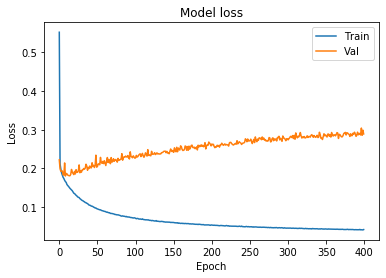

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

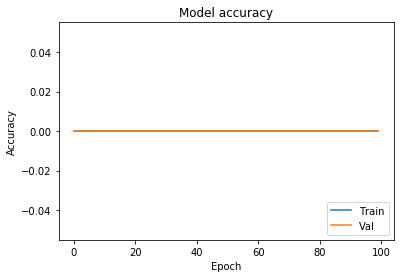

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
def print_result(model, x_val, y_val):
    y_pred_val = model.predict(x_val)
    print('---Test---')
    print('MAE: ', metrics.mean_absolute_error(y_val, y_pred_val))
    print('MSE: ', metrics.mean_squared_error(y_val, y_pred_val))
    print('R2: ', metrics.r2_score(y_val, y_pred_val))

In [62]:
print_result(model, X_train, Y_train)

---Test---
MAE:  0.15113507918905825
MSE:  0.040053329612899764
R2:  0.9342597777023369


In [63]:
print_result(model, X_val, Y_val)

---Test---
MAE:  0.3840394886367057
MSE:  0.2890213077573136
R2:  0.5366990693320004


In [32]:
y_pred_val =  model.predict(X_val)
print(y_pred_val[0])
print(Y_val[0])
print(metrics.mean_squared_error(y_pred_val[0], Y_val[0]))

[4.4481544]
[4.44265126]
3.0285132893387374e-05


## Data with Lasso

In [46]:
data = pd.read_csv('./data/data_cleaned_2.csv')

In [47]:
data.head()

,Unnamed: 0,id,host_id,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,0,a few days or more,within a day,within a few hours,within an hour
0,0,11551,43039,3836.0,100,1,3.0,1,1,london,...,0,0,1,0,0,0,0,0,0,1
1,2,13913,54730,3792.0,90,0,4.0,1,0,islington,...,1,0,0,0,0,0,0,0,1,0
2,3,38407,164566,3554.0,0,0,1.0,1,0,london,...,0,0,1,0,0,0,1,0,0,0
3,4,90700,491286,3285.0,86,0,2.0,1,0,kensington,...,0,0,1,0,0,0,0,1,0,0
4,5,15400,60302,3773.0,0,0,1.0,1,1,london,...,0,0,1,0,0,1,0,0,0,0


In [51]:
X_2 = data.loc[:, data.columns != 'price'].values
Y_2 = data.loc[:, data.columns == 'price'].values

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_2_scale = min_max_scaler.fit_transform(X_2)

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_2_scale, Y_2, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(59154, 617) (12676, 617) (12677, 617) (59154, 1) (12676, 1) (12677, 1)


In [26]:
model_2 = Sequential([
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(352,)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3),
    Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)),
])

In [27]:
model_2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [28]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=100, epochs=100,
          validation_data=(X_val, Y_val))

Train on 59142 samples, validate on 12673 samples
Epoch 1/100
59142/59142 [==============================] - 2s 34us/step - loss: 12.4907 - accuracy: 0.0000e+00 - val_loss: 12.4281 - val_accuracy: 0.0000e+00
Epoch 2/100
59142/59142 [==============================] - 1s 25us/step - loss: 12.4156 - accuracy: 0.0000e+00 - val_loss: 12.4240 - val_accuracy: 0.0000e+00
Epoch 3/100
59142/59142 [==============================] - 1s 21us/step - loss: 12.4117 - accuracy: 0.0000e+00 - val_loss: 12.4212 - val_accuracy: 0.0000e+00
Epoch 4/100
59142/59142 [==============================] - 1s 22us/step - loss: 12.4092 - accuracy: 0.0000e+00 - val_loss: 12.4190 - val_accuracy: 0.0000e+00
Epoch 5/100
59142/59142 [==============================] - 1s 21us/step - loss: 12.4084 - accuracy: 0.0000e+00 - val_loss: 12.4174 - val_accuracy: 0.0000e+00
Epoch 6/100
59142/59142 [==============================] - 1s 21us/step - loss: 12.4071 - accuracy: 0.0000e+00 - val_loss: 12.4162 - val_accuracy: 0.0000e+00
Ep

In [29]:
print_result(model_2, X_train, Y_train)

---Test---
MAE:  3.4332522519053836
MSE:  12.399179848422065
R2:  -19.253775897541725


In [30]:
print_result(model_2, X_val, Y_val)

---Test---
MAE:  3.434746781550957
MSE:  12.412203666029496
R2:  -19.191696635152223


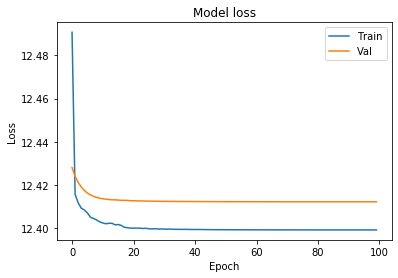

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()